In [20]:
import cv2
import h5py
from PIL import Image
import numpy as np
from os import sep
import matplotlib.pyplot as plt
from matplotlib import cm as c
from keras.models import model_from_json

In [21]:
def load_model():
    # Function to load and return neural network model 
    json_file = open('models\Model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("weights\model_A_weights.h5")
    return loaded_model

def create_img(path):
    #Function to load,normalize and return image 
    print(path)
    im = Image.open(path).convert('RGB')
    
    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    return im

In [22]:
def predict(path):
    #Function to load image,predict heat map, generate count and return (count , image , heat map)
    model = load_model()
    image = create_img(path)
    ans = model.predict(image)
    count = np.sum(ans)
    return count,image,ans

In [23]:
ans,img,hmap = predict('D:'+sep+'Shanghai\part_A_final\\test_data\images\IMG_100.jpg')

D:\Shanghai\part_A_final\test_data\images\IMG_100.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


nan


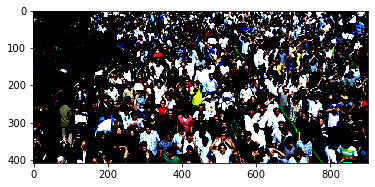

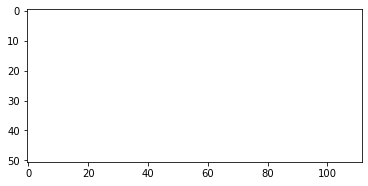

In [24]:

print(ans)
#Print count, image, heat map
plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
plt.show()
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()


In [19]:
temp = h5py.File('D:'+sep+'Shanghai\part_A_final\\test_data\ground_truth\IMG_170.h5' , 'r')
temp_1 = np.asarray(temp['density'])
#plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)

Original Count :  664
